In [1]:
import numpy as np
import pandas as pd 
df = pd.read_csv("IWBNetwork_6b6c_27b1_6573.csv")

c:\users\chitransh\appdata\local\programs\python\python38\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (1,2,4,5,6,7,8,9,10,11,12,13,14,15) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [2]:
df.drop(["longitude","latitude", "WaveHeight", "WavePeriod", "MeanWaveDirection", "Hmax","QC_Flag"],inplace = True, axis = 1)

In [3]:
df = df.iloc[331371:]

In [4]:
buoy_ident = { 'M2':1 , 'M3': 2, 'M4':3, 'M5': 4, 'M6': 5}
#buoys = ['M2', 'M3', 'M4', 'M5','M6']

In [5]:
# Selecting only the values of rows that have buoys ident as M2 to M6
df = df.loc[df.station_id.isin(buoy_ident.keys()) ]

df = df.drop(["time"], axis = 1)

df.station_id.unique()

df = df.replace({ 'station_id': buoy_ident})

df.head()

,station_id,AtmosphericPressure,WindDirection,WindSpeed,Gust,AirTemperature,DewPoint,SeaTemperature,RelativeHumidity
331371,4,1006.2,NaN,NaN,NaN,5.3,1.7,10.6,78
331372,5,1015.8,20,18,33,7,0.9,11.4,65
331373,1,1007.2,50,17,25,5.5,-1.1,10.3,62
331374,2,1009.4,30,17,25,5.7,-1.2,10.4,61
331375,3,1011.2,10,12,20,4.7,1.1,10.2,78


In [6]:
df.shape

(377576, 9)

In [7]:
df = df.dropna()

In [8]:
y = df.iloc[:,-1]

In [9]:
X = df.iloc[:,:-1]

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [11]:
df = df.astype(float)

In [12]:
df['station_id'] = pd.to_numeric(df['station_id'], errors='coerce')

In [13]:
df.head()

,station_id,AtmosphericPressure,WindDirection,WindSpeed,Gust,AirTemperature,DewPoint,SeaTemperature,RelativeHumidity
331372,5.0,1015.8,20.0,18.0,33.0,7.0,0.9,11.4,65.0
331373,1.0,1007.2,50.0,17.0,25.0,5.5,-1.1,10.3,62.0
331374,2.0,1009.4,30.0,17.0,25.0,5.7,-1.2,10.4,61.0
331375,3.0,1011.2,10.0,12.0,20.0,4.7,1.1,10.2,78.0
331376,5.0,1015.6,40.0,17.0,31.0,6.7,2.3,11.4,74.0


In [14]:
X_test = X_test.drop(["station_id"], axis=1)
X_train = X_train.drop(["station_id"], axis =1)

# Scatter plots for features

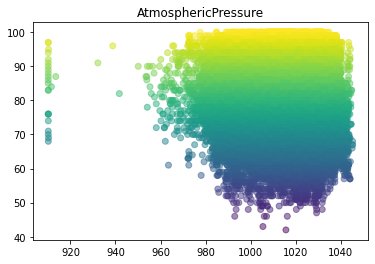

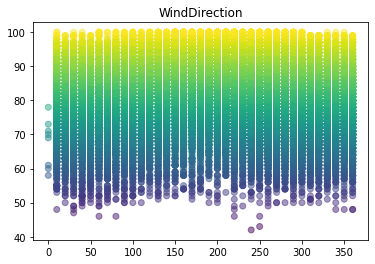

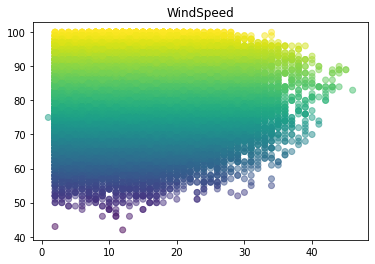

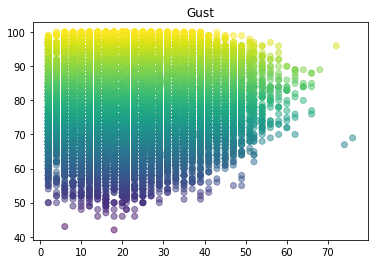

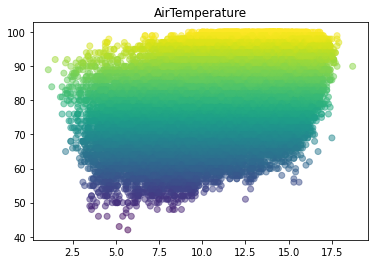

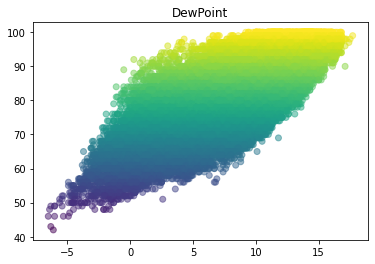

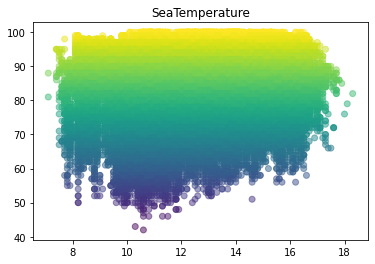

In [15]:
import matplotlib.pyplot as plt
for c in X_train.columns:
    plt.title(c);
    plt.scatter(X_train[c], y_train, c=y_train, alpha=0.5);
    plt.show()

# Line plots for features

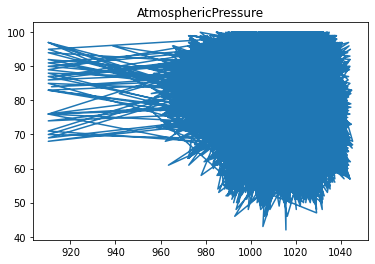

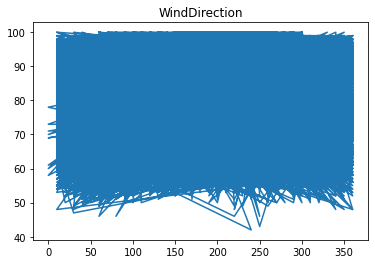

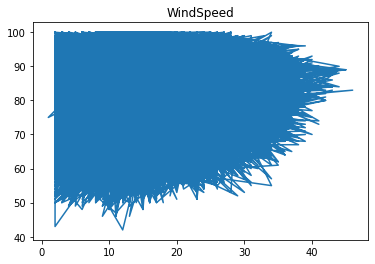

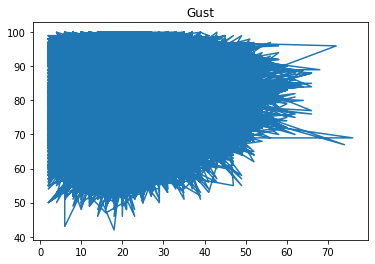

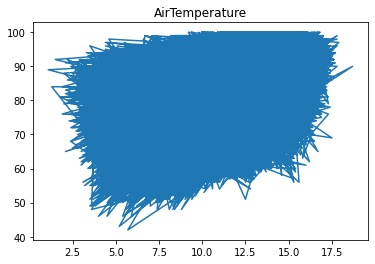

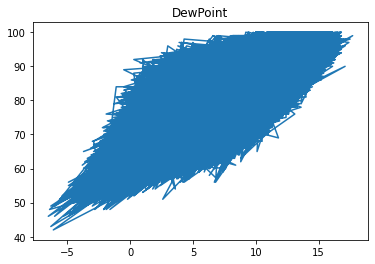

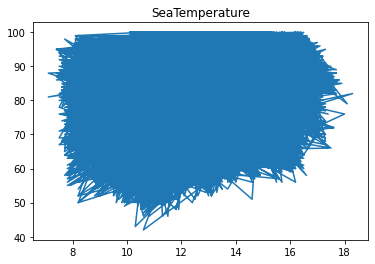

In [16]:
for c in X_train.columns:
    plt.title(c);
    plt.plot(X_train[c], y_train)
    plt.show()

In [17]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57307 entries, 518950 to 603321
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   AtmosphericPressure  57307 non-null  object
 1   WindDirection        57307 non-null  object
 2   WindSpeed            57307 non-null  object
 3   Gust                 57307 non-null  object
 4   AirTemperature       57307 non-null  object
 5   DewPoint             57307 non-null  object
 6   SeaTemperature       57307 non-null  object
dtypes: object(7)
memory usage: 3.5+ MB


In [18]:
X_test.head()

,AtmosphericPressure,WindDirection,WindSpeed,Gust,AirTemperature,DewPoint,SeaTemperature
603989,1012.1,240,14,20,10.9,9.5,13.8
486465,994.1,240,26,33,11.5,10.5,9.6
629226,1000.9,220,16,21,13.4,7.1,15.3
375264,1025.2,100,12,20,2.4,-3.4,8.5
391494,1017.2,320,9,18,9.4,5,11.4


In [19]:
# Converting to float values for processing
for cols in X_test.columns:
    X_test[cols] = pd.to_numeric(X_test[cols])

for cols in X_train.columns:
    X_train[cols] = pd.to_numeric(X_train[cols])

In [20]:
type(y_train)

pandas.core.series.Series

In [21]:
y_test = pd.to_numeric(y_test)

In [22]:
from matplotlib import pyplot

# Correlation 

In [23]:
X_train.corr()

,AtmosphericPressure,WindDirection,WindSpeed,Gust,AirTemperature,DewPoint,SeaTemperature
AtmosphericPressure,1.000000,-0.068966,-0.384785,-0.416527,0.022431,-0.016929,-0.002269
WindDirection,-0.068966,1.000000,0.109918,0.128619,0.116292,0.052017,0.145835
WindSpeed,-0.384785,0.109918,1.000000,0.952899,-0.046195,0.001261,-0.096603
Gust,-0.416527,0.128619,0.952899,1.000000,-0.106892,-0.060111,-0.124324
AirTemperature,0.022431,0.116292,-0.046195,-0.106892,1.000000,0.900038,0.857351
DewPoint,-0.016929,0.052017,0.001261,-0.060111,0.900038,1.000000,0.680775
SeaTemperature,-0.002269,0.145835,-0.096603,-0.124324,0.857351,0.680775,1.000000


# HeatMap

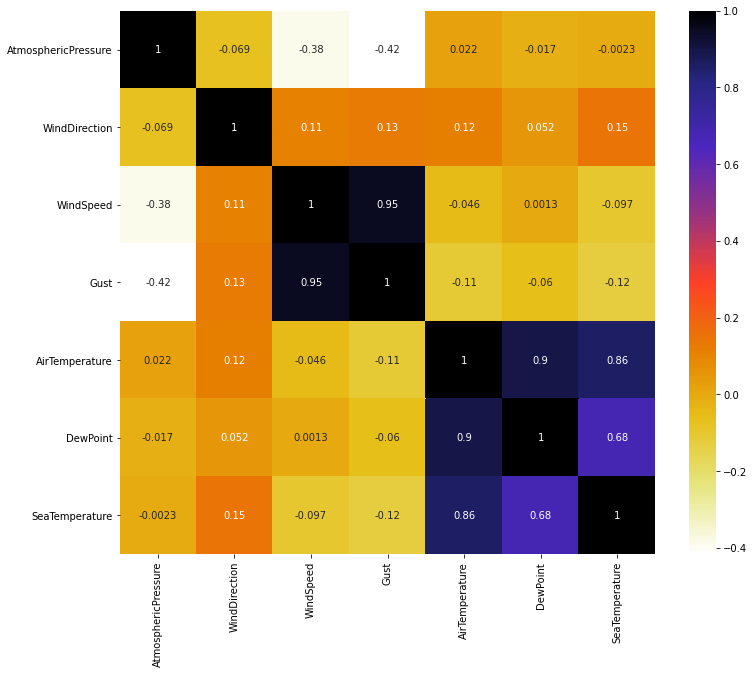

In [24]:
import seaborn as sns
plt.figure(figsize=(12,10))
cor=X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [25]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [26]:
corr_features = correlation(X_train, 0.8)
# len(set(corr_features))

In [27]:
corr_features

{'DewPoint', 'Gust', 'SeaTemperature'}

In [28]:
X_train.drop(corr_features, axis = 1)
X_test.drop(corr_features, axis = 1)

,AtmosphericPressure,WindDirection,WindSpeed,AirTemperature
603989,1012.1,240.0,14.0,10.9
486465,994.1,240.0,26.0,11.5
629226,1000.9,220.0,16.0,13.4
375264,1025.2,100.0,12.0,2.4
391494,1017.2,320.0,9.0,9.4
...,...,...,...,...
396143,1021.8,250.0,7.0,13.0
338334,1018.8,110.0,2.0,7.5
632047,1002.9,270.0,24.0,14.3
578236,1000.3,110.0,17.0,6.2
